In [1]:
import numpy as np
import pylab
import pandas as pd
from sklearn.preprocessing import StandardScaler
import time


from tsne import TSNE

from contrastive_loss import ContrastiveLoss 

In [28]:

def get_Data():
    penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
    penguins = penguins.dropna()
    penguin_data = penguins[
    [
        "species_short",
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
    ].values
    
    for i in range(len(penguin_data)):
        name = penguin_data[i][0]
        if name == 'Adelie':
            penguin_data[i][0] = 1
        elif name == 'Chinstrap':
            penguin_data[i][0] = 2
        else: 
            penguin_data[i][0] = 3
            
    train, test = splitData(penguin_data)
    
    train_data = [data[1:] for data in train]
    train_data = StandardScaler().fit_transform(train_data)
    test_data = [data[1:] for data in test]
    test_data = StandardScaler().fit_transform(test_data)
    train_label = [data[0] for data in train]
    test_label = [data[0] for data in test]
    return train_data, train_label, test_data, test_label



In [4]:
def splitData(data):
    np.random.shuffle(data)
    split = int(len(data)*0.8)
    train, test = np.split(data, [split])
    return train, test
    

50
Mean value of sigma: 0.591571
Iteration 10: error is 10.908236
Iteration 20: error is 9.759311
Iteration 30: error is 9.802336
Iteration 40: error is 9.788324
Iteration 50: error is 9.649555


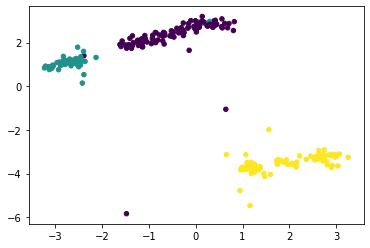

100
Mean value of sigma: 0.591571
Iteration 10: error is 10.914208
Iteration 20: error is 9.898801
Iteration 30: error is 10.106410
Iteration 40: error is 9.974061
Iteration 50: error is 9.842843
Iteration 60: error is 9.733437
Iteration 70: error is 9.702802
Iteration 80: error is 10.014501
Iteration 90: error is 10.019879
Iteration 100: error is 9.825840


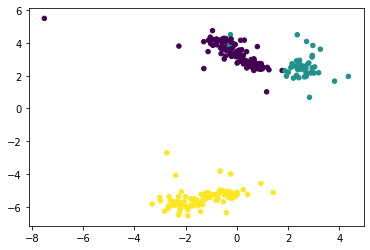

150
Mean value of sigma: 0.591571
Iteration 10: error is 11.618054
Iteration 20: error is 10.076319
Iteration 30: error is 10.152507
Iteration 40: error is 9.875259
Iteration 50: error is 9.652956
Iteration 60: error is 9.651826
Iteration 70: error is 9.698115
Iteration 80: error is 9.884999
Iteration 90: error is 9.736466
Iteration 100: error is 9.704518
Iteration 110: error is 0.789866
Iteration 120: error is 0.485495
Iteration 130: error is 0.399964
Iteration 140: error is 0.350827
Iteration 150: error is 0.334028


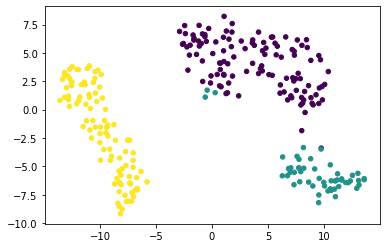

200
Mean value of sigma: 0.591571
Iteration 10: error is 11.590388
Iteration 20: error is 10.073706
Iteration 30: error is 9.857086
Iteration 40: error is 9.710989
Iteration 50: error is 9.795906
Iteration 60: error is 9.631843
Iteration 70: error is 9.882340
Iteration 80: error is 10.112658
Iteration 90: error is 9.968389
Iteration 100: error is 9.962337
Iteration 110: error is 0.825221
Iteration 120: error is 0.493712
Iteration 130: error is 0.383427
Iteration 140: error is 0.355375
Iteration 150: error is 0.345223
Iteration 160: error is 0.338695
Iteration 170: error is 0.332726
Iteration 180: error is 0.326767
Iteration 190: error is 0.321422
Iteration 200: error is 0.317651


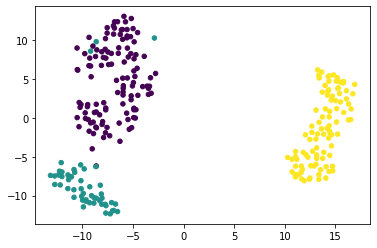

250
Mean value of sigma: 0.591571
Iteration 10: error is 11.098444
Iteration 20: error is 9.764547
Iteration 30: error is 9.870375
Iteration 40: error is 9.808103
Iteration 50: error is 9.855371
Iteration 60: error is 9.757566
Iteration 70: error is 9.814088
Iteration 80: error is 10.010401
Iteration 90: error is 9.778340
Iteration 100: error is 9.825093
Iteration 110: error is 0.684794
Iteration 120: error is 0.432965
Iteration 130: error is 0.369840
Iteration 140: error is 0.349951
Iteration 150: error is 0.340368
Iteration 160: error is 0.333435
Iteration 170: error is 0.320266
Iteration 180: error is 0.314210
Iteration 190: error is 0.309594
Iteration 200: error is 0.306760
Iteration 210: error is 0.304559
Iteration 220: error is 0.302782
Iteration 230: error is 0.301326
Iteration 240: error is 0.300051
Iteration 250: error is 0.299050


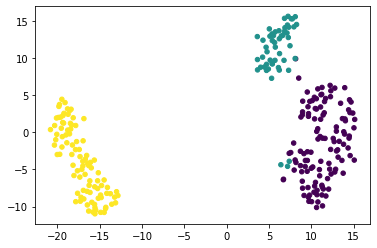

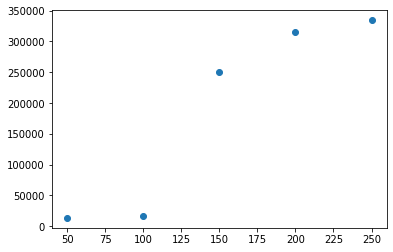

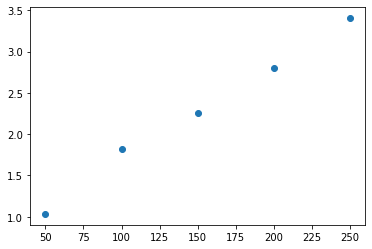

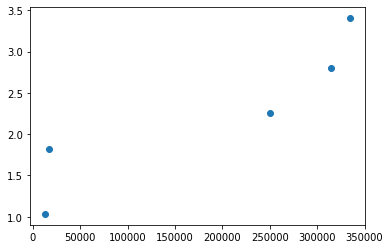

In [95]:
train_data, train_label, test_data, test_label = get_Data()
test_iterations(train_data, train_label, 57.74575140626314, 7.68440519687684, 0.32198067399882235)


In [93]:
def test_iterations(data, label, p, e, m):
    loss = ContrastiveLoss()
    all_quality = []
    all_i = []
    all_time = []
    for i in range(50, 300, 50):
        print(i)
        start = time.time()
        Y = tsne.tsne(data, dims = 2, perplexity = p, exageration = e, momentum = m, iterations = i)
        end = time.time()
        losses = loss.get_loss(Y, label)
        all_quality.append(losses)
        all_i.append(i)
        all_time.append(end-start)
        pylab.scatter(Y[:, 0], Y[:, 1], s=20, c=label)
        pylab.show()
        
    pylab.scatter(all_i, all_quality)
    pylab.show()
    pylab.scatter(all_i, all_time)
    pylab.show()
    pylab.scatter(all_quality, all_time)
    pylab.show()

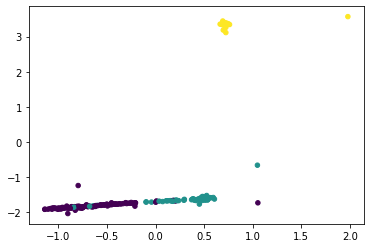

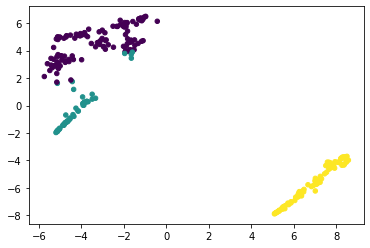

In [79]:
train_data, train_label, test_data, test_label = get_Data()
plot(train_data, train_label, 57.74575140626314, 7.68440519687684, 0.32198067399882235, 100)
plot(train_data, train_label, 20, 4, 0.65, 200)

In [48]:
def plot(data, label, p, e, m, i):
    Y = tsne.tsne(data, dims = 2, perplexity = p, exageration = e, momentum = m, iterations = i)
    pylab.scatter(Y[:, 0], Y[:, 1], s=20, c=label)
    pylab.show()

In [78]:
train_data, train_label, test_data, test_label = get_Data()
get_best(train_data, train_label)

30 5820.3587913766505
4 2737.1538264167893
0.65 1811.4012980448347

57.74575140626314 1962.2189343676548
6.031929354378312 1422.5577572484094
0.2944271909999159 1979.9740003647576

57.74575140626314 1461.4459117161402
6.663118960624632 1075.9180896707192
0.2944271909999159 1073.5720602431293

57.74575140626314 1067.8093597404732
7.68440519687684 1117.8135585983966
0.32198067399882235 1022.7080938317408



In [77]:
def get_best(data, label):
    tsne = TSNE()
    score = np.inf
    n_score = 0
    iterations = 100
    tol = 100
    
    perplexity = 30
    exageration = 4
    momentum = 0.65
    while abs(score - n_score) > tol:
        n_score = score
        p, n = get_best_perplexity(data, label, exageration, momentum, iterations)
        print(perplexity, n)
        if n < score:
            score = n
            perplexity = p 
        
        e, n = get_best_exageration(data, label, perplexity, momentum, iterations)
        print(exageration, n)
        if n < score:
            score = n
            exageration = e
        
        m, n = get_best_momentum(data, label, perplexity, exageration, iterations)
        print(momentum, n)
        if n < score:
            score = n
            momentum = m
        
        print()
        

In [57]:
def get_best_perplexity(data, label, e, m, i):
    loss = ContrastiveLoss()
    a = 10
    b = 60
    gr = (np.sqrt(5)+1)/2
    tolerance = 5
    
    c = b - (b - a) / gr
    d = a + (b - a) / gr
    min_loss = 0
    count = 0
    while abs(b - a) > tolerance:
        #print(count, c, d)
        Y = tsne.tsne(data, dims = 2, perplexity = c, exageration = e, momentum = m, iterations = i)
        c_loss = loss.get_loss(Y, label)
        
        Y = tsne.tsne(data, dims = 2, perplexity = d, exageration = e, momentum = m, iterations = i)
        d_loss = loss.get_loss(Y, label)
        if c_loss < d_loss:
            b = d
            min_loss = c_loss
        else:
            a = c
            min_loss = d_loss
        c = b - (b - a) / gr
        d = a + (b - a) / gr
        count += 1
    return (b + a) / 2, min_loss

In [58]:
def get_best_exageration(data, label, p, m, i):
    loss = ContrastiveLoss()
    a = 1
    b = 8
    gr = (np.sqrt(5)+1)/2
    tolerance = 1
    
    c = b - (b - a) / gr
    d = a + (b - a) / gr
    min_loss = 0
    count = 0
    while abs(b - a) > tolerance:
        #print(count, c, d)
        Y = tsne.tsne(data, dims = 2, perplexity = p, exageration = c, momentum = m, iterations = i)
        c_loss = loss.get_loss(Y, label)
        
        Y = tsne.tsne(data, dims = 2, perplexity = p, exageration = d, momentum = m, iterations = i)
        d_loss = loss.get_loss(Y, label)
        if c_loss < d_loss:
            b = d
            min_loss = c_loss
        else:
            a = c
            min_loss = d_loss
        c = b - (b - a) / gr
        d = a + (b - a) / gr
        count += 1
    return (b + a) / 2, min_loss

In [59]:
def get_best_momentum(data, label, p, e, i):
    loss = ContrastiveLoss()
    a = 0.2
    b = 1
    gr = (np.sqrt(5)+1)/2
    tolerance = 0.05
    
    c = b - (b - a) / gr
    d = a + (b - a) / gr
    min_loss = 0
    count = 0
    while abs(b - a) > tolerance:
        #print(count, c, d)
        Y = tsne.tsne(data, dims = 2, perplexity = p, exageration = e, momentum = c, iterations = i)
        c_loss = loss.get_loss(Y, label)
        
        Y = tsne.tsne(data, dims = 2, perplexity = p, exageration = e, momentum = d, iterations = i)
        d_loss = loss.get_loss(Y, label)
        if c_loss < d_loss:
            b = d
            min_loss = c_loss
        else:
            a = c
            min_loss = d_loss
        c = b - (b - a) / gr
        d = a + (b - a) / gr
        count += 1
    return (b + a) / 2, min_loss

NameError: name 'all_Y' is not defined

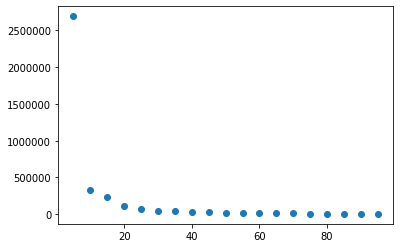

1
Preprocessing the data using PCA...
Computing P-values for point 0 of 334...
Computing P-values for point 100 of 334...
Computing P-values for point 200 of 334...
Computing P-values for point 300 of 334...
Iteration 0 of 200...
Iteration 50 of 200...
Iteration 100 of 200...


KeyboardInterrupt: 

NameError: name 'scaled_penguin_data' is not defined

array([[0.03589561, 0.93783386],
       [0.97950176, 0.96434612],
       [0.45373412, 0.55850763],
       [0.64186716, 0.60270236],
       [0.3151412 , 0.19796387]])